1) Delivery_time -> Predict delivery time using sorting time 

# Data Exploration

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
print(data.isnull().sum())

Delivery Time    0
Sorting Time     0
dtype: int64


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Data Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

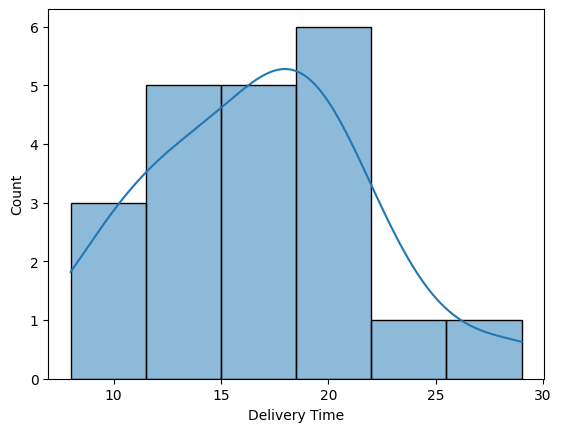

In [7]:
sns.histplot(data['Delivery Time'],kde=True)
plt.show()

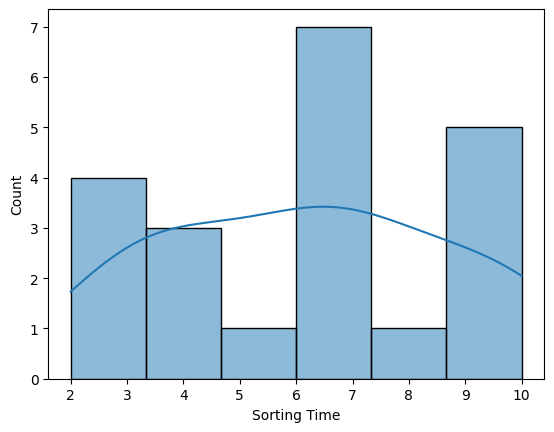

In [8]:
sns.histplot(data['Sorting Time'], kde=True)
plt.show()

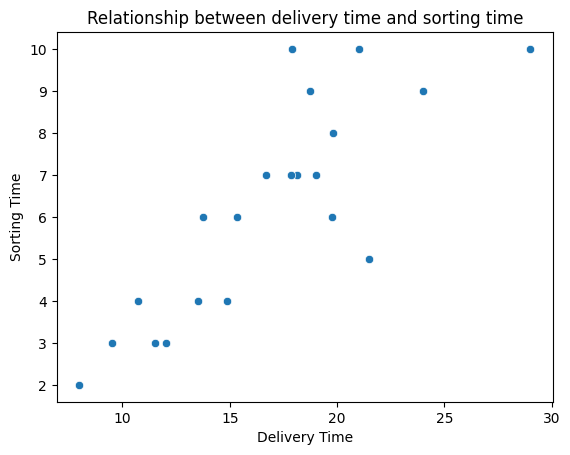

In [9]:
sns.scatterplot(x=data['Delivery Time'], y=data['Sorting Time'], data=data)
plt.title("Relationship between delivery time and sorting time")
plt.show()

C:\Users\asifs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


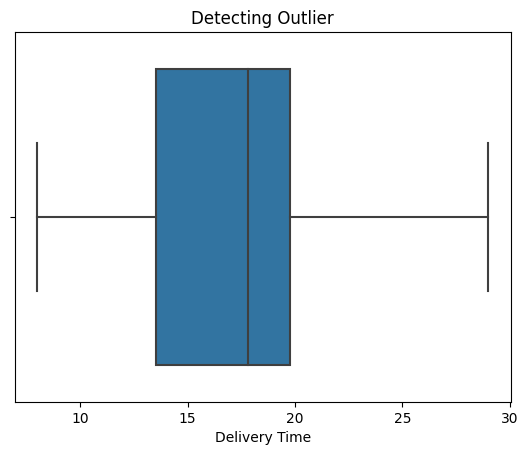

In [10]:
sns.boxplot(data['Delivery Time'])
plt.title('Detecting Outlier')
plt.show()

C:\Users\asifs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


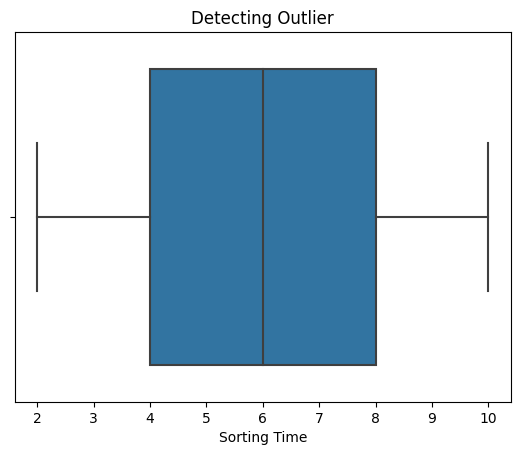

In [11]:
sns.boxplot(data['Sorting Time'])
plt.title('Detecting Outlier')
plt.show()

In [12]:
correlation_matrix = data.corr()
print('Correlation :',correlation_matrix)

Correlation :                Delivery Time  Sorting Time
Delivery Time       1.000000      0.825997
Sorting Time        0.825997      1.000000


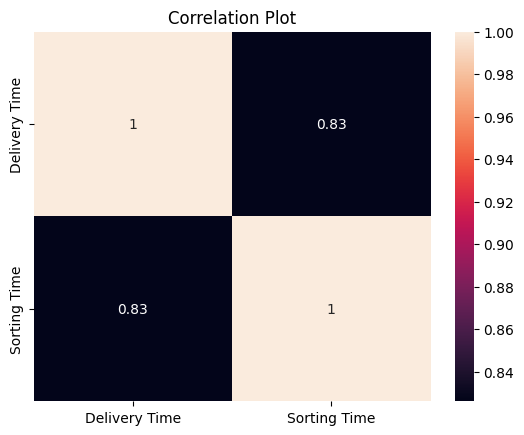

In [13]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Plot")
plt.show()

# Splitting Data into Train-Test

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = data['Sorting Time']
y = data['Delivery Time']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
## Reshaping to 2D from 1D

In [16]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

# Model Training

In [17]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_test, y_pred)

0     21.00
17    18.11
15    14.88
1     13.50
8     17.90
Name: Delivery Time, dtype: float64 [24.9247435  18.85200984 12.77927618 12.77927618 24.9247435 ]


# Model Evaluation

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE = ',mean_absolute_error(y_test, y_pred))
print('MSE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ',mean_squared_error(y_test, y_pred, squared=False))
print('R2_error = ',r2_score(y_test, y_pred))

MAE =  2.9025888966971176
MSE =  14.046738956635016
RMSE =  3.7478979383962705
R2_error =  -1.0207599586367362


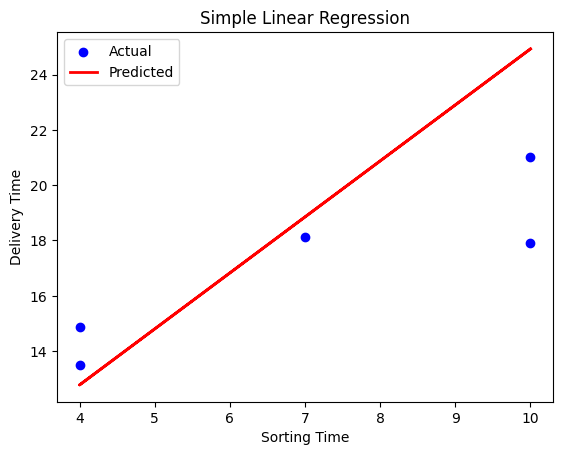

In [19]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()